In [1]:
import mpl_toolkits.axisartist.grid_finder
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import random as npr

In [2]:
def plot_path(df,t=252):
    x = np.linspace(0,t,t)
    for i in range(0,t):
        plt.plot(x,df[::,i])

In [3]:
def vasicek(S0,mean,volatility,T=1,t=252,N=100,k=1):
    S = np.zeros((t,N))
    dt = T/t
    mu = mean
    sigma = volatility
    S[0] = S0
    kappa = mu
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        S[i] = S[i-1] + k * (kappa - S[i-1]) * dt + sigma * phi * np.sqrt(dt)
    return S

In [4]:
def bk_path(S0,mean,volatility,T=1,t=252,N=100,k=1):
    S = np.zeros((t,N))
    dt = T/t
    mu = mean
    sigma = volatility
    S[0] = S0
    #alpha = mu
    alpha = mu - ((sigma ** 2) / (2*k))
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        S[i] = S[i-1] + k * (alpha - S[i-1]) * dt + sigma * phi * np.sqrt(dt)
    return S

In [5]:
def mv_path(S0,mean,volatility,T=1,t=252,N=100,k=1):
    S = np.zeros((t,N))
    dt = T/t
    mu = mean
    sigma = volatility
    S[0] = S0
    #alpha = mu
    alpha = mu - ((sigma ** 2) / (2*k))
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        #S[i] = S[i-1] + k * (alpha - S[i-1]) * dt + sigma * phi * np.sqrt(dt)
        S[i] = S[i-1] * ( 1 + k * (mu - np.log(S[i-1])) * dt + sigma * phi * np.sqrt(dt))

    return S


In [6]:
def mv1_path(S0,mean,volatility,T=1,t=252,N=100,k=1):
    X = np.zeros((t,N))
    dt = T/t
    mu = np.log(mean)
    sigma = volatility
    X[0] = np.log(S0)
    #alpha = mu
    alpha = mu - ((sigma ** 2) / (2*k))
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        X[i] = X[i-1] + k * (alpha - X[i-1]) * dt + sigma * phi * np.sqrt(dt)
        #X[i] = X[i-1] * ( 1 + k * (mu - np.log(X[i-1])) * dt + sigma * phi * np.sqrt(dt))

    return np.exp(X)


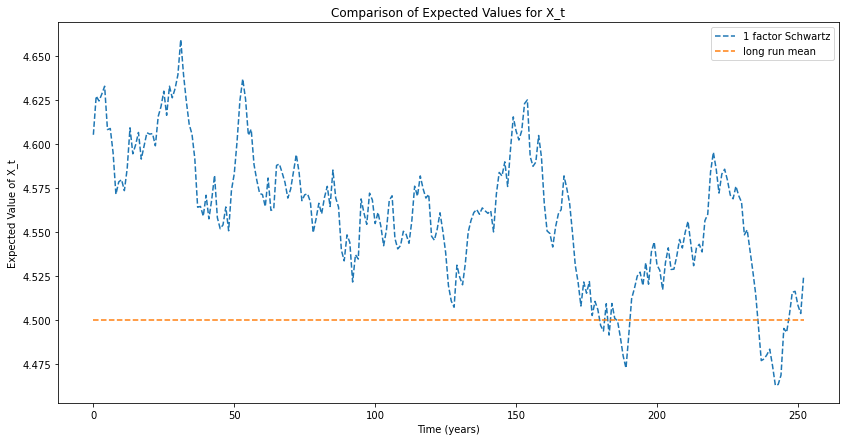

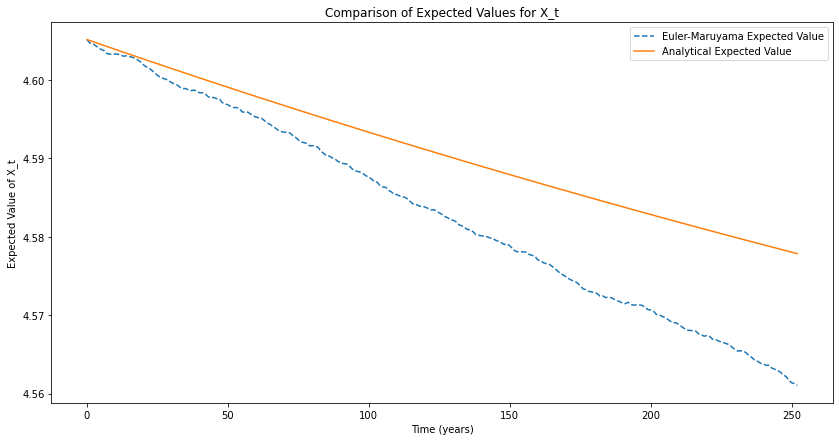

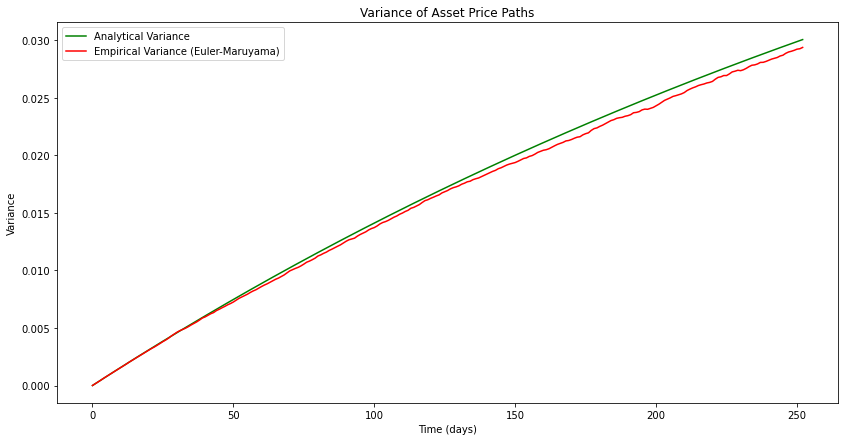

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def expected_log_price(X0, mu, kappa, t):
    return X0 * np.exp(-kappa * t) + mu * (1 - np.exp(-kappa * t))

def variance_log_price(sigma, kappa, t):
    return (sigma ** 2) / (2 * kappa) * (1 - np.exp(-2 * kappa * t))


# Parameters
S0 = 100
X0 = np.log(S0)  # Initial log price
kappa = 0.3  # Speed of mean reversion
mu = np.log(90)  # Long-term mean, adjusted for log transformation
sigma = 0.2  # Volatility
T = 1  # Total time (1 year)
dt = 1/252  # Time step size, assuming daily steps in a trading year
N = int(T / dt)  # Number of time steps
num_paths = 10000  # Number of paths to simulate

# Function to calculate the expected value analytically
def expected_value_OU(X0, mu, kappa, t):
    return X0 * np.exp(-kappa * t) + mu * (1 - np.exp(-kappa * t))

# Simulate the paths using the Euler-Maruyama method
np.random.seed(0)  # For reproducibility
X_paths = np.zeros((num_paths, N + 1))
X_paths[:, 0] = X0

alpha = mu - ((sigma ** 2) / (2*kappa))

for i in range(1, N + 1):
    dw = np.random.normal(scale=np.sqrt(dt), size=num_paths)
    X_paths[:, i] = X_paths[:, i - 1] + kappa * (alpha - X_paths[:, i - 1]) * dt + sigma * dw

# Calculate the expected value at each time step by averaging across paths
expected_values_euler = X_paths.mean(axis=0)
variance_euler = X_paths.var(axis=0)

# Calculate the analytical expected values at each time step
times = np.linspace(0, T*252, N + 1)
analytical_E_X = np.array([expected_log_price(X0, mu, kappa, t) for t in np.linspace(0, T, int(T/dt)+1)])
analytical_Var_X = np.array([variance_log_price(sigma, kappa, t) for t in np.linspace(0, T, int(T/dt)+1)])

# Convert analytical mean and variance from log space to price
analytical_E_S = np.exp(analytical_E_X)
analytical_Var_S = (np.exp(analytical_Var_X) - 1) * np.exp(2 * analytical_E_X + analytical_Var_X)


# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(times, X_paths[0], label='1 factor Schwartz', linestyle='--')
plt.plot(times, [mu] * (N+1), label='long run mean', linestyle='--')
plt.title('Comparison of Expected Values for X_t')
plt.xlabel('Time (years)')
plt.ylabel('Expected Value of X_t')
plt.legend()
plt.show()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(times, expected_values_euler, label='Euler-Maruyama Expected Value', linestyle='--')
plt.plot(times, analytical_E_X, label='Analytical Expected Value', linestyle='-')
plt.title('Comparison of Expected Values for X_t')
plt.xlabel('Time (years)')
plt.ylabel('Expected Value of X_t')
plt.legend()
plt.show()


# Plotting variance paths with analytical and empirical variances
plt.figure(figsize=(14, 7))
plt.plot(times, analytical_Var_X, label='Analytical Variance', color='green')
plt.plot(times, variance_euler, label='Empirical Variance (Euler-Maruyama)', color='red')
plt.title('Variance of Asset Price Paths')
plt.xlabel('Time (days)')
plt.ylabel('Variance')
plt.legend()
plt.show()

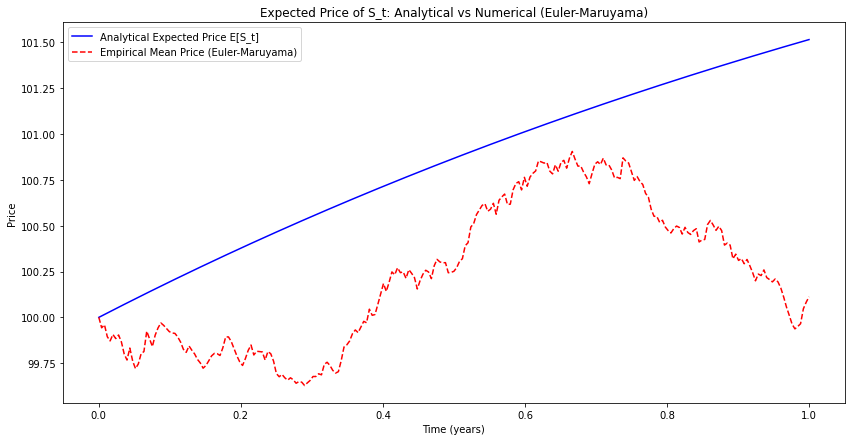

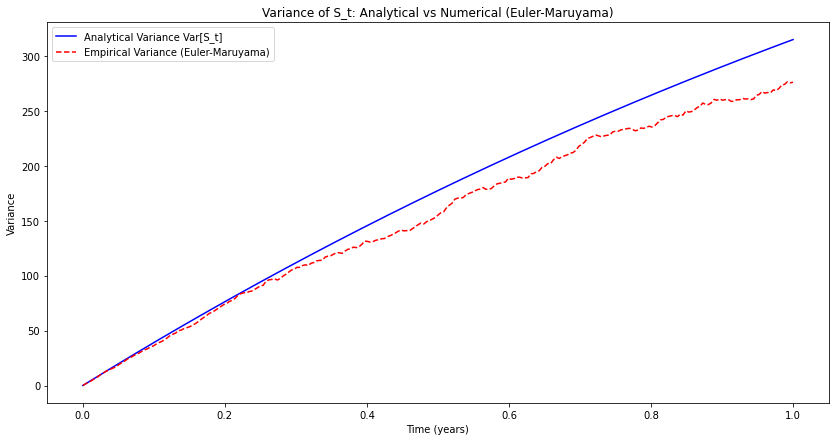

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
kappa = 0.3  # Speed of mean reversion
mu = np.log(100)  # Long-term mean in the log space, which is ln(100) since the long-run mean price is 100
sigma = 0.2  # Volatility in the log space
S0 = 100  # Initial price
T = 1  # Total time (1 year)
dt = 1/252  # Time step size, assuming daily steps in a trading year
N = int(T / dt)  # Number of time steps
num_paths = 1000  # Number of paths to simulate

# Analytical expected price and variance of S
def expected_log_price(X0, mu, kappa, t):
    return X0 * np.exp(-kappa * t) + mu * (1 - np.exp(-kappa * t))

def variance_log_price(sigma, kappa, t):
    return (sigma ** 2) / (2 * kappa) * (1 - np.exp(-2 * kappa * t))

times = np.linspace(0, T, N + 1)
E_Xt = np.array([expected_log_price(np.log(S0), mu, kappa, t) for t in times])
Var_Xt = np.array([variance_log_price(sigma, kappa, t) for t in times])
E_St = np.exp(E_Xt + 0.5 * Var_Xt)
Var_St = (np.exp(Var_Xt) - 1) * np.exp(2 * E_Xt + Var_Xt)

# Euler-Maruyama method to simulate S_t paths
np.random.seed(0)
S_paths = np.zeros((num_paths, N + 1))
S_paths[:, 0] = S0

for i in range(1, N + 1):
    dW = np.random.normal(scale=np.sqrt(dt), size=num_paths)
    dS = kappa * (mu - np.log(S_paths[:, i - 1])) * S_paths[:, i - 1] * dt + sigma * S_paths[:, i - 1] * dW
    S_paths[:, i] = S_paths[:, i - 1] + dS

# Calculate the empirical mean and variance at each time step
mean_S_paths = S_paths.mean(axis=0)
var_S_paths = S_paths.var(axis=0)

# Plotting the Expected Price
plt.figure(figsize=(14, 7))
plt.plot(times, E_St, label='Analytical Expected Price E[S_t]', color='blue')
plt.plot(times, mean_S_paths, label='Empirical Mean Price (Euler-Maruyama)', linestyle='--', color='red')
plt.title('Expected Price of S_t: Analytical vs Numerical (Euler-Maruyama)')
plt.xlabel('Time (years)')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting the Variance
plt.figure(figsize=(14, 7))
plt.plot(times, Var_St, label='Analytical Variance Var[S_t]', color='blue')
plt.plot(times, var_S_paths, label='Empirical Variance (Euler-Maruyama)', linestyle='--', color='red')
plt.title('Variance of S_t: Analytical vs Numerical (Euler-Maruyama)')
plt.xlabel('Time (years)')
plt.ylabel('Variance')
plt.legend()
plt.show()


In [9]:
df = mv1_path(58.37,58.5,0.2,1,52,1000,1)
#df = mv_path(0.06,0.08,0.02,1,52,1000,0.2)

In [10]:
S0,mu,sigma,T,t,N,kappa = 58.37,58.5,0.2,52,1,1000,1

array([46.55321901, 54.43686147, 61.52797946, 57.9266712 , 54.05994088,
       55.66411591, 58.13363042, 57.21880085, 62.11570352, 54.07571448,
       68.48914111, 60.21155196, 56.6239304 , 58.36261985, 69.50997113,
       63.78266507, 58.40357354, 56.43626067, 63.16967615, 61.63323369,
       56.54190859, 51.69829693, 61.51581457, 64.01564289, 69.0682545 ,
       60.3730698 , 52.6178457 , 53.19256978, 49.26717999, 61.72493215,
       50.84186763, 58.24796319, 57.69373645, 59.6804047 , 56.58258632,
       60.56412065, 51.23476903, 61.44676038, 53.6129114 , 62.53571006,
       56.90158829, 70.21852965, 59.86170928, 58.44031347, 57.67763708,
       61.79412212, 62.38758979, 51.37332354, 56.81503936, 59.98581063,
       55.62614515, 59.7650357 , 48.3808296 , 57.67866471, 66.78382072,
       57.66311821, 68.00988284, 57.15056316, 62.68370722, 54.57076941,
       62.27525881, 51.86191937, 56.36662217, 52.31604639, 54.30647756,
       60.88036561, 57.95533098, 55.69120239, 64.46279229, 57.12

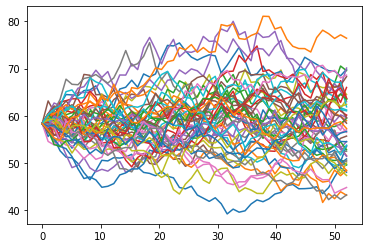

In [11]:
plot_path(df,52)
df.mean(axis = 0)

# Calibration
alpha, sigma, k = 0.08, 0.02, 0.2
r= df

#tau = T - t
s_square = sigma ** 2 / (2 * (k ** 3)) * ( 4 * np.exp(-k * tau) + 2 *k*tau - np.exp(-2*k*tau) - 3)
B = (1 - np.exp(k * tau)) / k
A = alpha * ( B - tau) + 0.5 * s_square ** 2
dB = np.exp(-a * tau)
dA = alpha * (np.exp(-a*tau) - 1) + sigma**2 / 2 / (a**2) * (( 1 - np.exp(-a * tau))** 2 )

P = np.exp(A -B* r)
R = (B * r - A) / tau
f = dB * r - dA


T = len(df)
YC = []
for i,v in enumerate(df):
    tau = T - i + 1
    YC.append((B * i - A) / tau)
YC

In [12]:
S0,mu,sigma,T,t,N,kappa = 58.37,np.log(58.5),0.2,252,1,1000,1

X0 = np.log(S0)
alpha = mu - sigma ** 2 / (2 * kappa)

# t = 0
T = 52
t = 0
mean_X = alpha + (X0 - alpha) * np.exp(-kappa * (T-t))
var_X = sigma ** 2 / (2 * kappa) * ( 1 - np.exp(-2*kappa*(T-t)))
mean_S = np.exp(mean_X + 0.5 * var_X)
var_S = (np.exp(var_X) - 1) * np.exp(2* mean_X + var_X)

In [13]:
print(mean_S)
print(var_S)
print(np.mean(df))
print(np.var(df))
df

57.91791527432635
67.7650902759566
58.313258482839196
38.34004478462055


array([[58.37      , 58.37      , 58.37      , ..., 58.37      ,
        58.37      , 58.37      ],
       [57.31158693, 57.79593535, 59.68480941, ..., 58.91161209,
        58.84463027, 60.73541036],
       [55.16412222, 58.22128986, 59.9557671 , ..., 60.60111093,
        56.88471741, 59.36393737],
       ...,
       [47.05827939, 42.4389059 , 66.94178259, ..., 62.84089329,
        77.77552835, 70.11859659],
       [49.02092383, 43.90726971, 70.52358353, ..., 63.67279278,
        74.16163239, 68.10247266],
       [48.04779365, 43.16295589, 69.54462785, ..., 66.15656966,
        73.74750078, 69.20145844]])

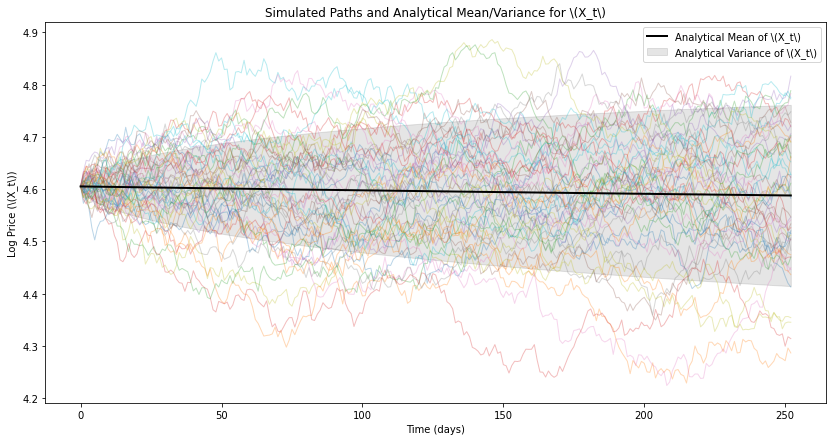

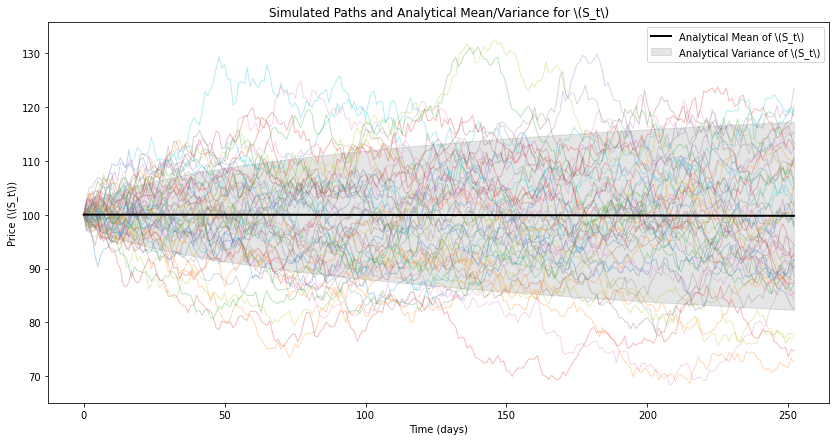

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
kappa = 0.3  # Rate of mean reversion
mu = np.log(100)  # Long-term mean in the log space, ln(100)
sigma = 0.2  # Volatility in the log space
S0 = 100  # Initial price
T = 1  # Total time (1 year)
dt = 1/252  # Daily steps in a trading year
num_paths = 1000  # Number of paths to simulate

# Adjusted long-term mean for the OU process
alpha = mu - ((sigma ** 2) / (2 * kappa))

# Analytical expected value and variance for log price Xt
def analytical_Xt(kappa, alpha, sigma, t, X0):
    expected_Xt = X0 * np.exp(-kappa * t) + alpha * (1 - np.exp(-kappa * t))
    variance_Xt = (sigma ** 2) / (2 * kappa) * (1 - np.exp(-2 * kappa * t))
    return expected_Xt, variance_Xt

# Analytical expected value and variance for price St
def analytical_St(kappa, alpha, sigma, t, S0):
    expected_Xt, variance_Xt = analytical_Xt(kappa, alpha, sigma, t, np.log(S0))
    expected_St = np.exp(expected_Xt + variance_Xt / 2)
    variance_St = (np.exp(variance_Xt) - 1) * np.exp(2 * expected_Xt + variance_Xt)
    return expected_St, variance_St

# Time points
times = np.linspace(0, T, int(T / dt) + 1)
days = times * 252  # Convert years to days for the x-axis

# Pre-calculate analytical values for each time point
analytical_mean_X = np.zeros_like(times)
analytical_var_X = np.zeros_like(times)
analytical_mean_S = np.zeros_like(times)
analytical_var_S = np.zeros_like(times)
for i, time in enumerate(times):
    analytical_mean_X[i], analytical_var_X[i] = analytical_Xt(kappa, alpha, sigma, time, np.log(S0))
    analytical_mean_S[i], analytical_var_S[i] = analytical_St(kappa, alpha, sigma, time, S0)

# Simulate paths using the Euler-Maruyama method for the OU process
np.random.seed(0)  # For reproducibility
X_paths = np.zeros((num_paths, len(times)))
X_paths[:, 0] = np.log(S0)

for i in range(1, len(times)):
    dW = np.random.normal(scale=np.sqrt(dt), size=num_paths)
    X_paths[:, i] = X_paths[:, i - 1] + kappa * (alpha - X_paths[:, i - 1]) * dt + sigma * dW

# Plotting all paths for Xt
plt.figure(figsize=(14, 7))
for i in range(min(num_paths, 50)):  # Plot 50 paths for visibility
    plt.plot(days, X_paths[i], lw=1, alpha=0.3)

# Plotting the analytical mean and variance for Xt
plt.plot(days, analytical_mean_X, label='Analytical Mean of \(X_t\)', color='black', lw=2)
plt.fill_between(days, analytical_mean_X - np.sqrt(analytical_var_X), analytical_mean_X + np.sqrt(analytical_var_X), color='black', alpha=0.1, label='Analytical Variance of \(X_t\)')

plt.title('Simulated Paths and Analytical Mean/Variance for \(X_t\)')
plt.xlabel('Time (days)')
plt.ylabel('Log Price (\(X_t\))')
plt.legend()
plt.show()

# Convert paths to St
S_paths = np.exp(X_paths)

# Plotting all paths for St
plt.figure(figsize=(14, 7))
for i in range(min(num_paths, 50)):  # Plot 50 paths for visibility
    plt.plot(days, S_paths[i], lw=1, alpha=0.3)

# Plotting the analytical mean and variance for St
plt.plot(days, analytical_mean_S, label='Analytical Mean of \(S_t\)', color='black', lw=2)
plt.fill_between(days, analytical_mean_S - np.sqrt(analytical_var_S), analytical_mean_S + np.sqrt(analytical_var_S), color='black', alpha=0.1, label='Analytical Variance of \(S_t\)')

plt.title('Simulated Paths and Analytical Mean/Variance for \(S_t\)')
plt.xlabel('Time (days)')
plt.ylabel('Price (\(S_t\))')
plt.legend()
plt.show()


import numpy as np
import matplotlib.pyplot as plt

# Function to compute the analytical expected log price
def expected_log_price(alpha, kappa, t, X0):
    return X0 * np.exp(-kappa * t) + alpha * (1 - np.exp(-kappa * t))

# Function to compute the analytical variance of the log price
def variance_log_price(sigma, kappa, t):
    return (sigma ** 2) / (2 * kappa) * (1 - np.exp(-2 * kappa * t))

# Parameters
kappa = 0.3  # Rate of mean reversion
mu = np.log(100)  # Long-term mean in the log space, ln(100)
sigma = 0.2  # Volatility in the log space
S0 = 100  # Initial price
T = 1  # Total time (1 year)
dt = 1/52  # Daily steps in a trading year
num_paths = 10  # Number of paths to simulate

# Adjusted long-term mean for the OU process
alpha = mu - ((sigma ** 2) / (2 * kappa))

# Simulate paths using the Euler-Maruyama method for the OU process
np.random.seed(0)  # For reproducibility
X_paths = np.zeros((num_paths, int(T/dt) + 1))
X_paths[:, 0] = np.log(S0)

for i in range(1, int(T/dt) + 1):
    dW = np.random.normal(scale=np.sqrt(dt), size=num_paths)
    X_paths[:, i] = X_paths[:, i - 1] + kappa * (alpha - X_paths[:, i - 1]) * dt + sigma * dW

# Calculate the analytical mean for each time step
analytical_mean_X = np.array([expected_log_price(alpha, kappa, t, np.log(S0)) for t in np.linspace(0, T, int(T/dt)+1)])
analytical_Var_X = np.array([variance_log_price(sigma, kappa, t) for t in np.linspace(0, T, int(T/dt)+1)])

# Days array for plotting
days = np.linspace(0, T * 252, int(T / dt) + 1)

# Plotting all paths
plt.figure(figsize=(14, 7))
for i in range(num_paths):
    plt.plot(days, X_paths[i])  # Reduced alpha for visibility

# Plotting the analytical mean
plt.plot(days, analytical_mean_X, label='Analytical Mean of \(X_t\)', color='black', lw=2)

plt.title('Simulated Paths for \(X_t\) and Analytical Mean')
plt.xlabel('Time (days)')
plt.ylabel('Log Price (\(X_t\))')
plt.legend()
plt.show()
